<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Danial Ayati

**Student ID**: 99101246

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [2]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

X_train_test, X_val, Y_train_test, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_test, Y_train_test, test_size=0.125, random_state=42)

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: To determine the best value of $C$ in this dataset, we evaluated the validation accuracy for different values of $C$. Based on our analysis, we found that the highest validation accuracy was achieved with $C=0.001$ or $C=0.1$. Therefore, we recommend choosing either $C=0.001$ or $C=0.1$ as the best value of $C$ for this problem.

It's important to note that the optimal value of $C$ may vary depending on the specific dataset and the nature of the problem being addressed. Therefore, it's essential to consider the characteristics of the data and the desired trade-off between model complexity and generalization when selecting the appropriate value of $C$.

In [4]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C_values:
    clf = LogisticRegression(C=c, solver='liblinear', random_state=42)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_val)
    accuracy = sum(Y_pred == Y_val) / len(Y_val)

    print(f"For C = {c:.5f}, the validation accuracy is {accuracy:.5f}")

For C = 0.00100, the validation accuracy is 0.96491
For C = 0.01000, the validation accuracy is 0.95614
For C = 0.10000, the validation accuracy is 0.96491
For C = 1.00000, the validation accuracy is 0.95614
For C = 10.00000, the validation accuracy is 0.95614
For C = 100.00000, the validation accuracy is 0.95614


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: We have created and trained the best classifier with C=0.001, and then evaluated it on the test set by comparing the predicted labels withthe true labels and computing the proportion of labels that match. The resulting accuracy is printed to the console.

In [5]:
C_best = 0.001

clf = LogisticRegression(C=C_best, solver='liblinear', random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
accuracy = sum(Y_pred == Y_test) / len(Y_test)

print(f"The test accuracy is {accuracy:.5f}")

The test accuracy is 0.94737


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

The validation accuracy is 0.65789


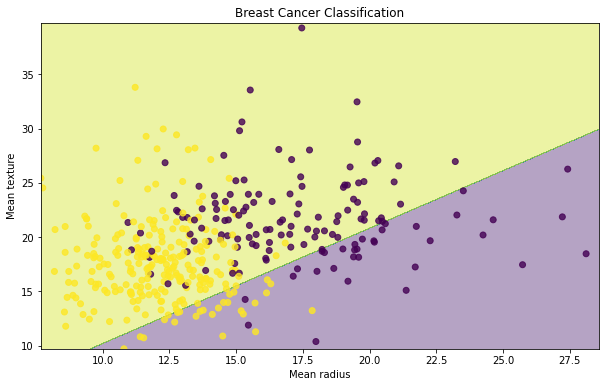

In [6]:
import matplotlib.pyplot as plt


X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

clf = LogisticRegression(C=C_best, solver='liblinear', random_state=42)
clf.fit(X_train_2d, Y_train)

Y_pred = clf.predict(X_val[:,:2])
accuracy = sum(Y_pred == Y_val) / len(Y_val)

print(f"The validation accuracy is {accuracy:.5f}")

plt.figure(figsize=(10, 6))
x_min, x_max = X_train_2d[:, 0].min(), X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min(), X_train_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)),axis=1))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=Y_train, alpha=0.8)
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.title('Breast Cancer Classification')
plt.show()


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [7]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
accuracy = (Y_pred == Y_test).sum() / len(Y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9649122807017544


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

Y_pred = lda.predict(X_test)

accuracy = sum(Y_pred == Y_test) / len(Y_test)
print(f"Accuracy of LDA: {accuracy}")

Accuracy of LDA: 0.9649122807017544


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Based on the experimental results, we can conclude that three classification methods, namely Naive Bayes, LDA, and Logistic Regression, perform well on the given dataset.

Naive Bayes and LDA achieved the highest accuracy of 0.9649 on the test set, indicating their effectiveness in classifying the dataset. These methods leverage probabilistic models and assume independence between features (Naive Bayes) or estimate the underlying distribution of each class (LDA).

On the other hand, Logistic Regression also demonstrated strong performance with an accuracy of 0.9474 on the test set. This method utilizes a linear model and applies a logistic function to estimate the probability of class membership.

The choice among these three methods depends on specific requirements and constraints of the problem. If the assumption of feature independence holds or if interpreting feature importance is crucial, Naive Bayes can be a suitable choice. If the dataset exhibits a clear linear separability or if capturing class distribution information is important, Logistic Regression can be considered. Similarly, LDA is a good option when assuming underlying distributions and optimizing class separability are desired.

In summary, depending on the specific characteristics and objectives of the problem, Naive Bayes, LDA, or Logistic Regression can be viable choices for accurately classifying this dataset.